# Load Modules

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare/collect data

In [80]:
import os

path = os.listdir('X-ray dataset/chest_xray/train/')
classes = {'NORMAL':0, 'PNEUMONIA':1}

In [81]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'X-ray dataset/chest_xray/train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [82]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [83]:
np.unique(Y)

array([0, 1])

In [84]:
pd.Series(Y).value_counts()

1    3875
0    1341
dtype: int64

In [85]:
X.shape, X_updated.shape

((5216, 200, 200), (5216, 40000))

# Visualize data

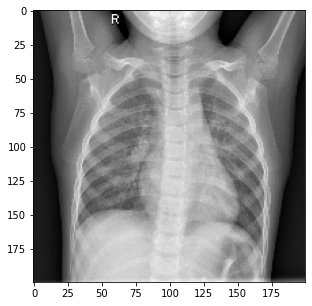

In [86]:
plt.imshow(X[0], cmap='gray')

# Prepare data

In [87]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(5216, 40000)

# Split Data

In [88]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [89]:
xtrain.shape, xtest.shape

((4172, 40000), (1044, 40000))

# Feature Scaling

In [90]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# Feature Selection: PCA

In [91]:
from sklearn.decomposition import PCA

In [92]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(4172, 40000) (1044, 40000)


In [93]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

# Train Model

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [95]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [96]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

# Evaluation

In [97]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 0.99784276126558
Testing Score: 0.9722222222222222


In [98]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9803451581975072
Testing Score: 0.9818007662835249


# Prediction

In [99]:
pred = sv.predict(xtest)

In [101]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 229,  245,  277,  306,  388,  602,  630,  692,  702,  703,  777,
         819,  825,  849,  882,  961,  976,  991, 1032], dtype=int64),)

In [102]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  19
1 1


# TEST MODEL

In [103]:
dec = {0:'NORMAL', 1:'Positive PNEUMONIA'}

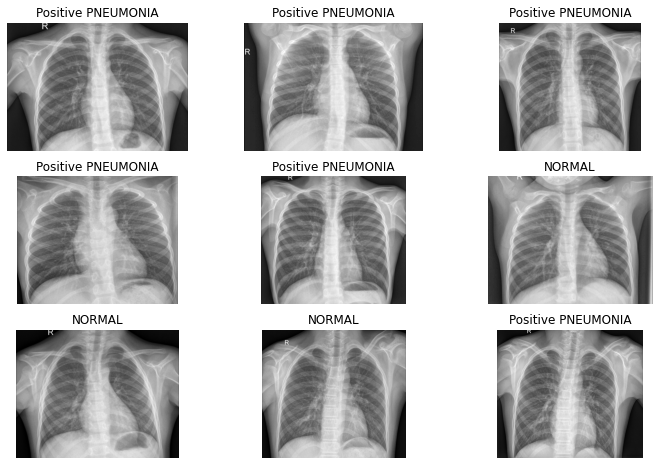

In [104]:
plt.figure(figsize=(12,8))
p = os.listdir('X-ray dataset/chest_xray/train/')
c=1
for i in os.listdir('X-ray dataset/chest_xray/test/NORMAL/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('X-ray dataset/chest_xray/test/NORMAL/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

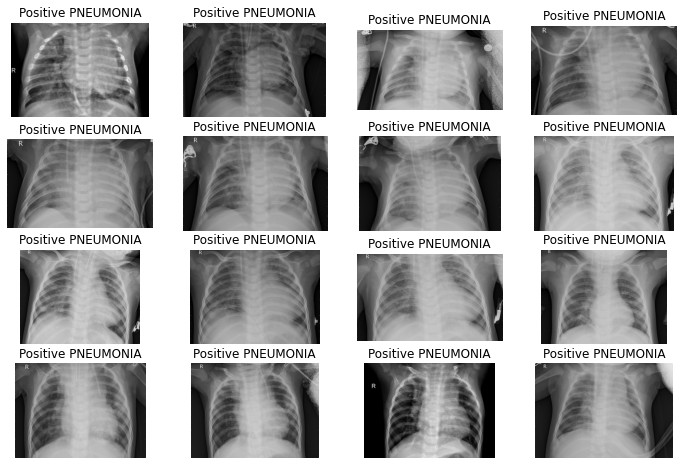

In [105]:
plt.figure(figsize=(12,8))
p = os.listdir('X-ray dataset/chest_xray/test/')
c=1
for i in os.listdir('X-ray dataset/chest_xray/test/PNEUMONIA/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('X-ray dataset/chest_xray/test/PNEUMONIA/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

# Accuracy

In [106]:
from sklearn.metrics import accuracy_score

prediction = sv.predict(xtest)

#print("Accuracy: "+str(accuracy_score(xtest, ytest)))

accuracy = sv.score(xtest, ytest)

categories = ["drd" , "no_drd" ]

print(" Accuracy :" , accuracy*100)

 Accuracy : 98.18007662835248


# Confusion Matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

RF=RandomForestClassifier(max_depth=20,n_estimators=200)
RF.fit(xtrain,ytrain)

ypredict = RF.predict(xtest)

print(RF.score(xtest,ytest))
cm = confusion_matrix(ytest, ypredict)

plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

print(classification_report(ytest,ypredict))

# ROC Curve

In [108]:
from sklearn.svm import SVC
clf_SVM=SVC(C=10,kernel='rbf')
clf_SVM.fit(xtrain,ytrain)

SVC(C=10)

In [109]:
y_pred=clf_SVM.predict(xtest)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 1, 1, ..., 0, 0, 1])

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       281
           1       0.98      1.00      0.99       763

    accuracy                           0.99      1044
   macro avg       0.99      0.98      0.98      1044
weighted avg       0.99      0.99      0.99      1044



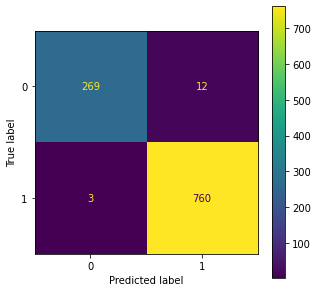

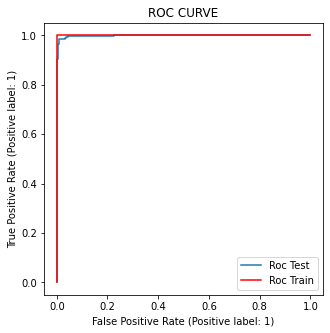

In [110]:
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve
print (classification_report(ytest,clf_SVM.predict(xtest)))
plot_confusion_matrix(clf_SVM,xtest,ytest)
fig=plot_roc_curve(clf_SVM,xtest,ytest,label="Roc Test")
fig=plot_roc_curve(clf_SVM,xtrain,ytrain,color='r',label="Roc Train",ax = fig.ax_)
plt.title("ROC CURVE")
plt.show()